# PREDICTION OF DAILY NUMBER OF RENTAL BIKES IN BIKESHARE SYSTEM

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.<br>

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data. <br>

The purpose of this analysis is to predict the number of rental bikes in a bike sharing system each day. The dataset has been obtained from the following link {https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset} in the UCI machine learning repository. <br>

## Data Reading and Understanding

In [1]:
import pandas as pd
#importing the dataset
data= pd.read_csv("C:/Users/user/Downloads/Bike-Sharing-Dataset/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
#checking the columns in the dataset and the types of variables in each columns
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Attribute Information

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
data.shape

(731, 16)

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


There are 731 rows and 22 columns in the above dataset.

## Data Cleaning/ Preprocessing

In [5]:
# Checking for punctuation marks in the dataset

In [6]:
import string

for i in string.punctuation:
    puncs=data.astype("str")==str(i)
    print(puncs.sum(),i)
    

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 !
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 "
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 #
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum        

There are no punctuation marks in the dataset.

In [7]:
#checking for missing values

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


There are no missing values in the dataset.

# Exploratory Data Analysis

## Univariate Analysis

__Target: cnt__ <br>
__cnt__ is the count of total rental bikes including both casual and registered.

In [9]:
data.cnt.describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

The mean of the count of total rental bikes daily is 4544 with a standard deviation of 1937.211452. The median of the total rental bikes daily is greater than the mean by 44 rental bikes. This shows there is a possibility of a slight positive skewness in the distribution of the count of total rental bikes daily. In order to check whether there is skewness, a distribution plot was obtained.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

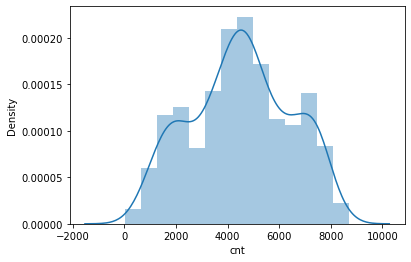

In [10]:
import seaborn as sns

sns.distplot(data.cnt)

From the distribution plot above it can be observed that the daily count of rental bikes follows a normal distribution.

__Season variable__ <br>

The variable season is assigned: <br>
1.- Spring
2.- Summer
3.- Fall
4.- Winter
<br>

These numbers in the season variable thus represent the above four seasons.

In [11]:
#To obtain the numbers in the dataset for each season
data.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

As seen above, most recorded observations are during fall and the fewest recorded observations are during winter.However, there are no major differences in the number of observations in each season. This is represented in a bar graph as shown below:

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'seasons'), Text(0, 0.5, 'number of observations')]

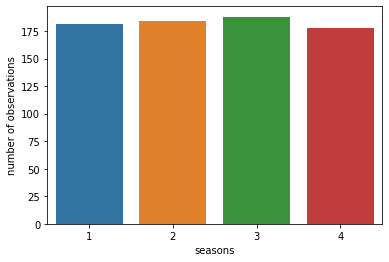

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt1=sns.countplot(data.season)
plt1.set(xlabel="seasons",ylabel="number of observations")

__Working day variable__ <br>

The variable is encoded with numbers 1 and 0:<br>

1.- Neither Weekend nor holiday <br>
0.- Otherwise


In [13]:
#obtaining the number of recorded observations for working day variable
data.workingday.value_counts()

1    500
0    231
Name: workingday, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Working day'), Text(0, 0.5, 'Number of observations')]

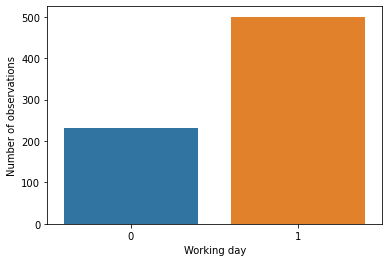

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt1=sns.countplot(data.workingday)
plt1.set(xlabel="Working day",ylabel="Number of observations")

As shown above, we conclude that the dataset has more observations for working days than days which are holidays and weekends.

__mnth variable__ <br>

This variable is contains recorded observations in the 12 months of the calendar.

In [15]:
#checking the observed values in each month

data.mnth.value_counts()



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: mnth, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Months')

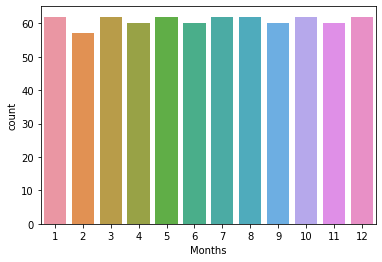

In [16]:
plt1=sns.countplot(data.mnth)
plt1.set_xlabel("Months")

April, June, September and November each have 60 recorded observations. February only had 57 observations. The rest of the months each had 62 recorded observations.

__Weather Sit variable__ <br>

The weather situation variable is encoded as shown below: <br>

1- Clear, few clouds, partly cloudy <br>
2- Mist+cloudy, mist+broken clouds, mist+few clouds, mist <br>
3- Light snow, light rain+thunderstorm+scatter clouds, light rain+scatters <br>
4- heavy rain+ ice pallets+thunderstorm+mist+snow+frog

In [17]:
#obtaining the number of recorded observations in each weather situation

data.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Weather sit')

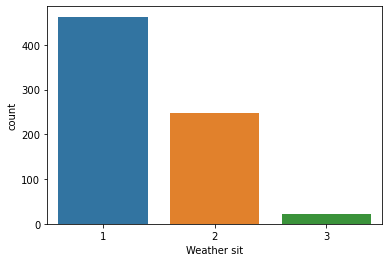

In [18]:
plt1=sns.countplot(data.weathersit)
plt1.set_xlabel("Weather sit")

The were no recorded observations when there was heavy rains+ice pallets+thunderstorm+mist+snow+fog. The highest observations recorded were when the weather was clear, few clouds and partly cloudy. The number of observations when there was mist was also greater than when there was a light snow, light rain, thunderstorm, scatter clouds, and light rain+scattered clouds.

__yr variable__

This is the year variable. 0 represents the year 2011 and 1 represents the year 2012

In [19]:
#obtaining the counts for the year
data.yr.value_counts()

1    366
0    365
Name: yr, dtype: int64

This shows that there were daily recordings for each day in 2011 and 2012. 2012 has 366 days since it is a leap year.

## Bivariate Analysis

In [20]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'windspeed'), Text(0, 0.5, 'count of bikes')]

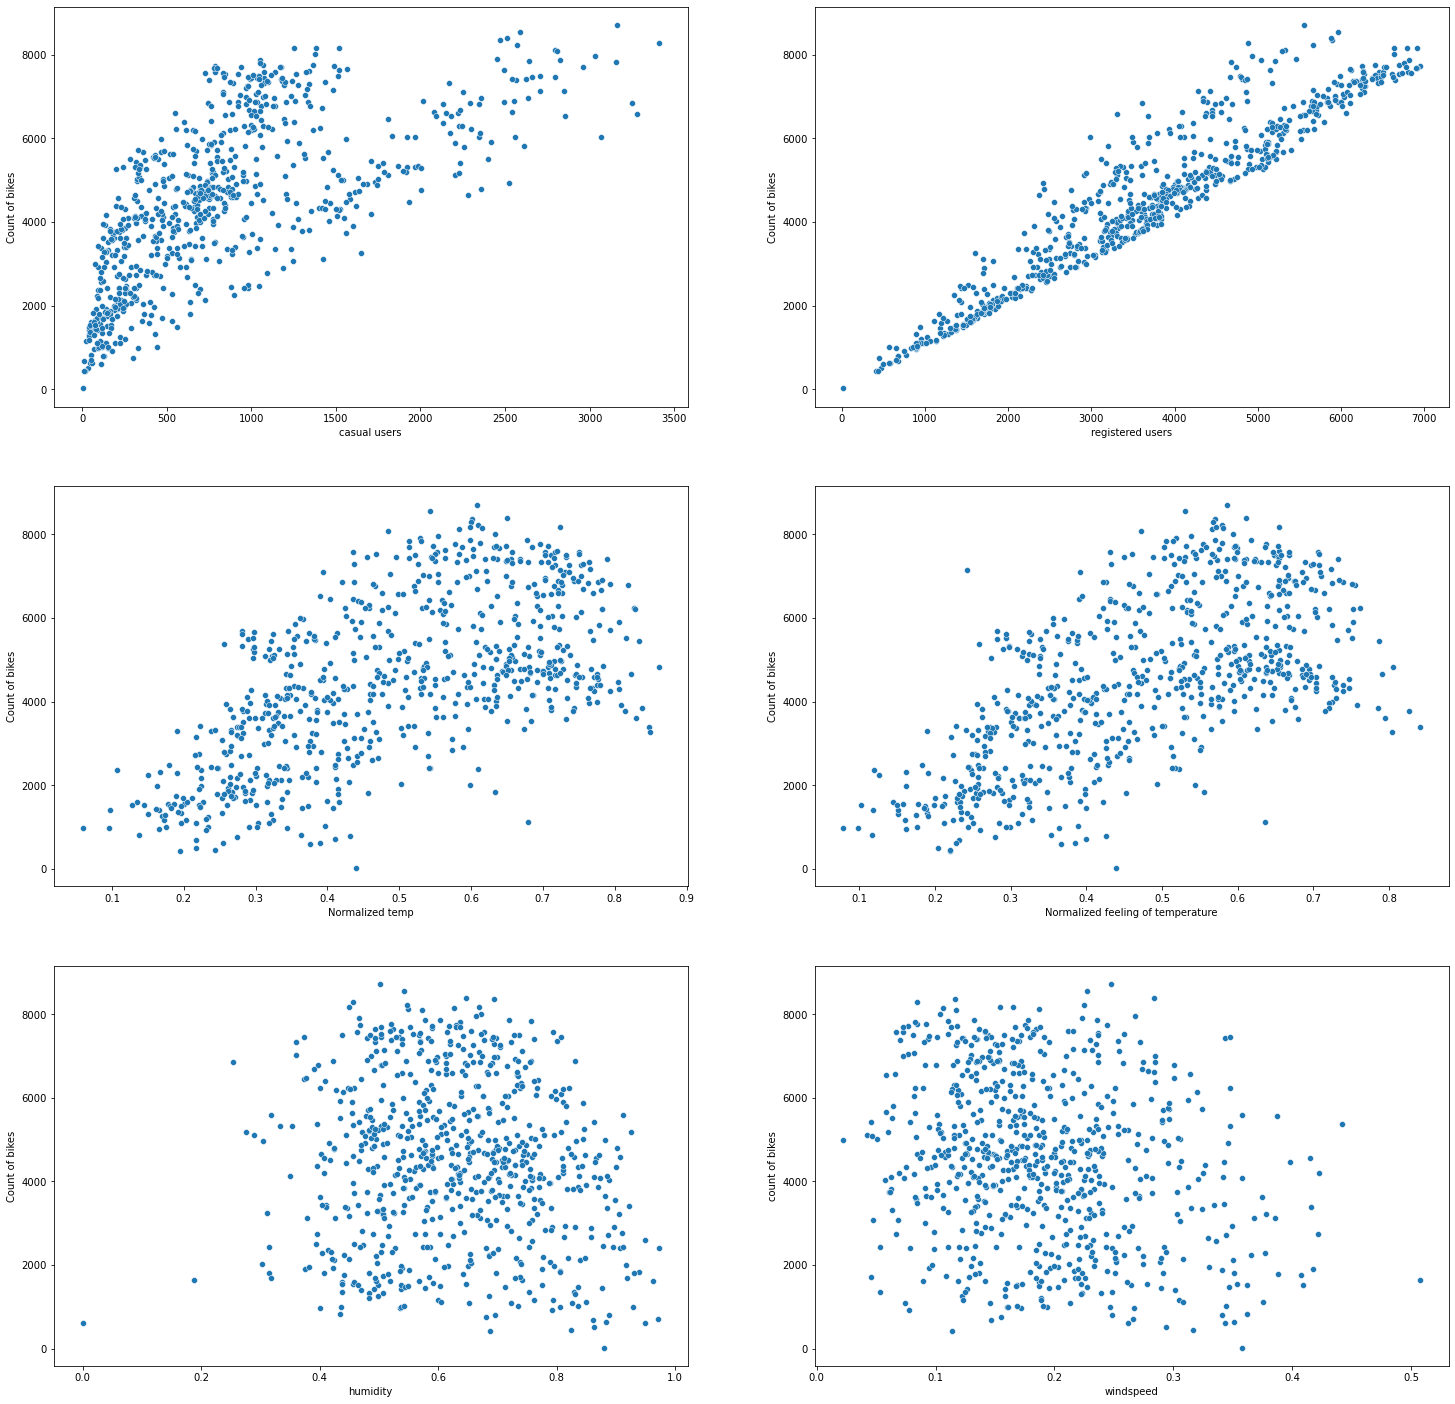

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig,axs=plt.subplots(3,2,figsize=(25,25))
plt1=sns.scatterplot(x="casual",y="cnt",data=data,ax=axs[0,0])
plt1.set(xlabel="casual users",ylabel="Count of bikes")
plt2=sns.scatterplot(x="registered",y="cnt",data=data,ax=axs[0,1])
plt2.set(xlabel="registered users",ylabel="Count of bikes")
plt3=sns.scatterplot(x="temp",y="cnt",data=data,ax=axs[1,0])
plt3.set(xlabel="Normalized temp",ylabel="Count of bikes")
plt4=sns.scatterplot(x="atemp",y="cnt",data=data,ax=axs[1,1])
plt4.set(xlabel="Normalized feeling of temperature",ylabel="Count of bikes")
plt5=sns.scatterplot(x="hum",y="cnt",data=data,ax=axs[2,0])
plt5.set(xlabel="humidity",ylabel="Count of bikes")
plt6=sns.scatterplot("windspeed",y="cnt",data=data,ax=axs[2,1])
plt6.set(xlabel="windspeed",ylabel="count of bikes")

From the above scatterplots we conclude that there is a strong positive correlation between the number of registered users and the count of bikes daily. There is also a slight positive correlation between the number of casual users and the daily count of bikes,normalized temperature and count of bikes, normalized feeling temperature and count of bikes. There is no correlation between humidity and count of bikes, windspeed and count of bikes.

### Year and count of bikes


In [22]:
mal=data[["yr","cnt"]].groupby("yr",as_index=False).mean()
mal

,yr,cnt
0,0,3405.761644
1,1,5599.934426


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

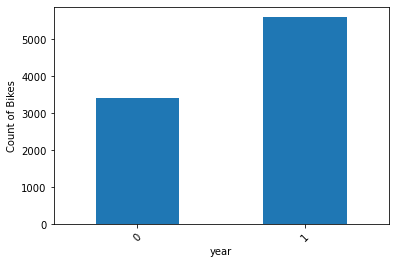

In [23]:
import matplotlib.pyplot as plt
plt1=mal.plot(x="yr",kind='bar',sort_columns=True,legend=False)
plt1.set(xlabel="year",ylabel="Count of Bikes")
plt.xticks(rotation=45)

There were more daily count of bikes in 2012 than 2011.

__Month and Count of bikes__

In [24]:
mal=data[["mnth","cnt"]].groupby("mnth",as_index=False).mean()
mal

,mnth,cnt
0,1,2176.338710
1,2,2655.298246
2,3,3692.258065
3,4,4484.900000
4,5,5349.774194
5,6,5772.366667
6,7,5563.677419
7,8,5664.419355
8,9,5766.516667
9,10,5199.225806


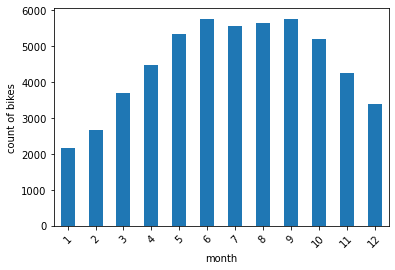

In [25]:
plt1=mal.plot(x="mnth",kind="bar",sort_columns=True,legend=False)
plt1.set(xlabel="month",ylabel="count of bikes")
plt.xticks(rotation=45)
plt.show()

__January__ has the least number of daily number of rental bikes while __June__ and __September__ have the highest number of daily number of rental bikes.

__Working days and Count of bikes__

In [26]:
mal=data[["workingday","cnt"]].groupby("workingday",as_index=False).mean()
mal

,workingday,cnt
0,0,4330.168831
1,1,4584.820000


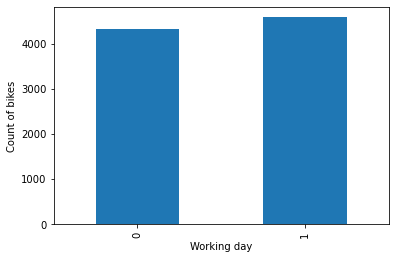

In [27]:
plt1=mal.plot(x="workingday",kind="bar",sort_columns=True,legend=False)
plt1.set(xlabel="Working day",ylabel="Count of bikes")
plt.show()

There are more rental bikes in a day than when there is neither a weekday or a holiday than other days.

__Weather and Count of bikes__

In [28]:
mal=data[["weathersit","cnt"]].groupby("weathersit",as_index=False).mean()
mal

,weathersit,cnt
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


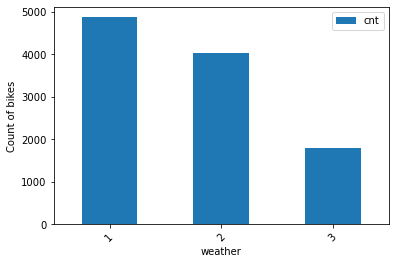

In [29]:
plt1=mal.plot(x="weathersit",kind="bar",sort_columns=True)
plt1.set(xlabel="weather",ylabel="Count of bikes")
plt.xticks(rotation=45)
plt.show()

The highest amount of rental bikes daily in the bike sharing system is when the weather is clear or few clouds or partly cloudy. There are no bikes rented when there is heavy rain+ice pallets+thundertorm+misty snow+fog. 

# Summary of Univariate and Bivariate analysis <br>

From the univariate and bivariate analysis done above, it is observed that we can filter out variables which do not affect th count of rental bikes daily in the model. The variables which will be considered for the prediction are: <br>

1. season
2. yr
3. mnth
4. workingday
5. weathersit
6. temp
7. atemp
8. casual
9. registered

In [30]:
df=data[["season","yr","mnth","workingday","weathersit","temp","atemp","casual","registered","cnt"]]

In [31]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

__Visualization of the numeric variables__

<Figure size 1080x360 with 0 Axes>

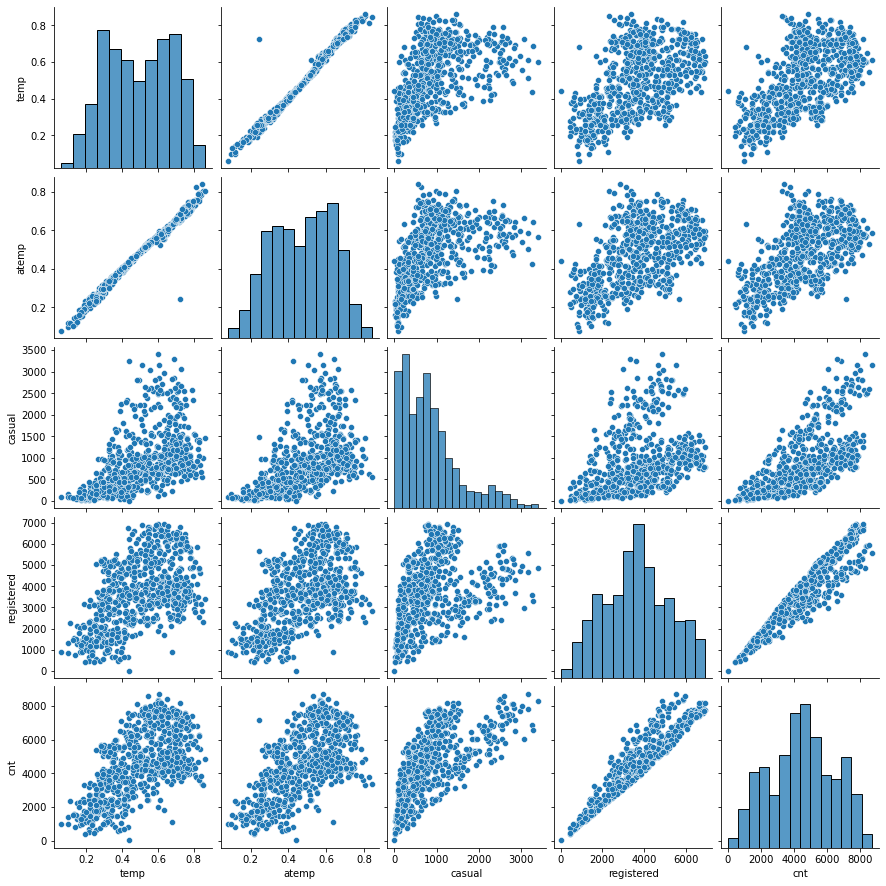

In [32]:
plt.figure(figsize=(15,5))
sns.pairplot(df[["temp","atemp","casual","registered","cnt"]])
plt.show()

There is a problem of multicollinearity. The variables temp and atemp have a strong positive correlation. We will thus remove the variable atemp since from the scatterplot performed in the bivariate analysis it did not portray a strong positive correlation as compared to the temp variable.

In [33]:
atemp=df.pop('atemp')
df.head()

,season,yr,mnth,workingday,weathersit,temp,casual,registered,cnt
0,1,0,1,0,2,0.344167,331,654,985
1,1,0,1,0,2,0.363478,131,670,801
2,1,0,1,1,1,0.196364,120,1229,1349
3,1,0,1,1,1,0.200000,108,1454,1562
4,1,0,1,1,1,0.226957,82,1518,1600


__Visualization of the Categorical Variables__

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

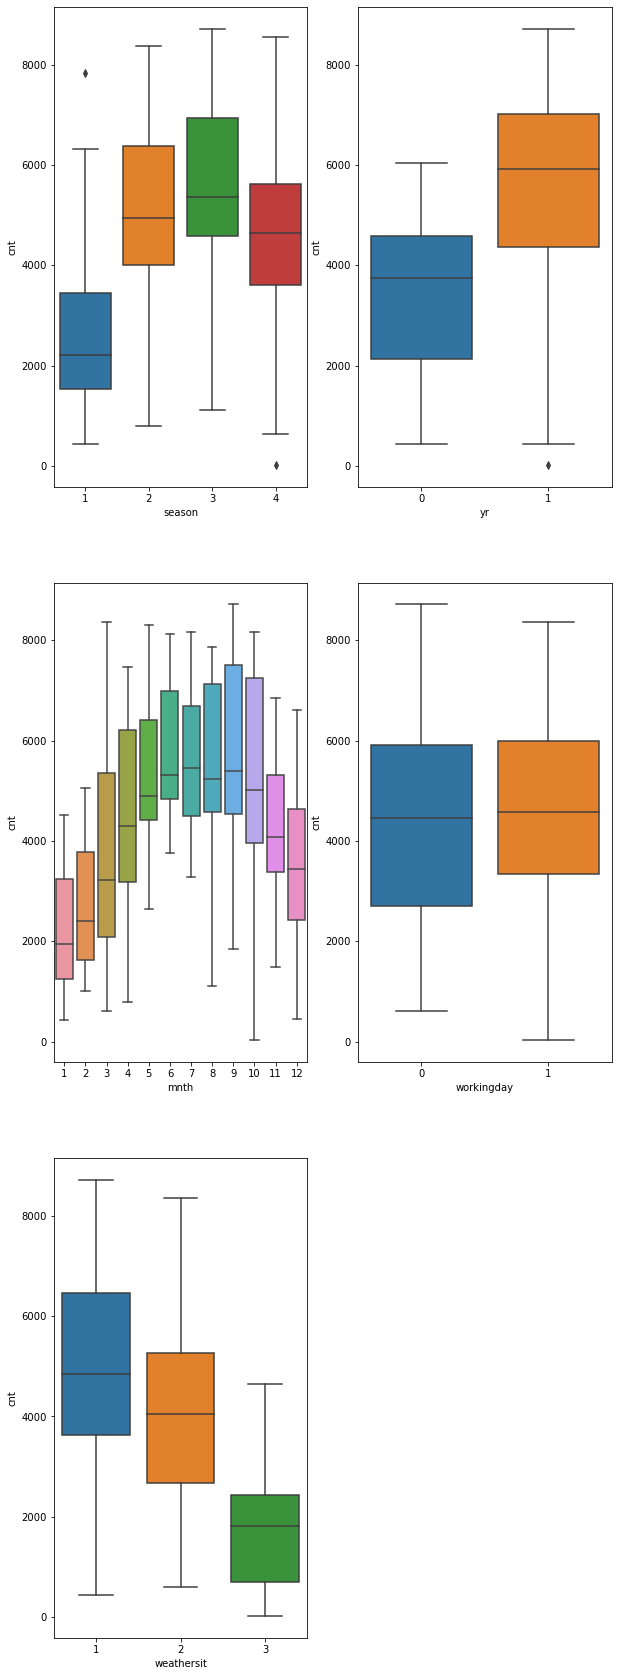

In [34]:
plt.figure(figsize=(10,30))
plt.subplot(3,2,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,2,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,2,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,2,4)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(3,2,5)
sns.boxplot(x='weathersit',y='cnt',data=df)

There are few outliers in the dataset as shown in the boxplots above.

# Data Preparation

__Dummy Variables__

The variables yr, season, workingday, weathersit,mnth are categorical variables and thus there is need to convert them to dummy variables.

___Season Variable___

In [35]:
season_cat=pd.get_dummies(df.season, drop_first= True)
df=pd.concat([df,season_cat],axis=1)
df=df.rename(columns={"season":"springer",
                         2:"summer",
                         3: "fall",
                         4:"winter"})
df.head()

,springer,yr,mnth,workingday,weathersit,temp,casual,registered,cnt,summer,fall,winter
0,1,0,1,0,2,0.344167,331,654,985,0,0,0
1,1,0,1,0,2,0.363478,131,670,801,0,0,0
2,1,0,1,1,1,0.196364,120,1229,1349,0,0,0
3,1,0,1,1,1,0.200000,108,1454,1562,0,0,0
4,1,0,1,1,1,0.226957,82,1518,1600,0,0,0


___Workingday variable___

In [36]:
wd_cat=pd.get_dummies(df.workingday,drop_first=True)
df=pd.concat([df,wd_cat],axis=1)
df=df.rename(columns={1:"notwh"})#Neither Weekend nor holiday
df.head()                        
                

,springer,yr,mnth,workingday,weathersit,temp,casual,registered,cnt,summer,fall,winter,notwh
0,1,0,1,0,2,0.344167,331,654,985,0,0,0,0
1,1,0,1,0,2,0.363478,131,670,801,0,0,0,0
2,1,0,1,1,1,0.196364,120,1229,1349,0,0,0,1
3,1,0,1,1,1,0.200000,108,1454,1562,0,0,0,1
4,1,0,1,1,1,0.226957,82,1518,1600,0,0,0,1


___Weathersit variable___

In [37]:
ws_cat=pd.get_dummies(df.weathersit,drop_first=True)
df=pd.concat([df,ws_cat],axis=1)
df=df.rename(columns={"weathersit":"clear",# Clear, few clouds, partly cloudy
                         2:"mist",#Mist+cloudy,mist+broken clouds,mist+few clouds, mist
                         3:"lightrs",#Light snow, light rain+thunderstorm+scatter clouds,light rain+scatter clouds
                         4:"heavyr"})#heavy rain+ice pallets+thunderstorm+mist+snow+frog
df.head()                         

,springer,yr,mnth,workingday,clear,temp,casual,registered,cnt,summer,fall,winter,notwh,mist,lightrs
0,1,0,1,0,2,0.344167,331,654,985,0,0,0,0,1,0
1,1,0,1,0,2,0.363478,131,670,801,0,0,0,0,1,0
2,1,0,1,1,1,0.196364,120,1229,1349,0,0,0,1,0,0
3,1,0,1,1,1,0.200000,108,1454,1562,0,0,0,1,0,0
4,1,0,1,1,1,0.226957,82,1518,1600,0,0,0,1,0,0


___yr variable___

In [38]:
yr_cat=pd.get_dummies(df.yr,drop_first=True)
df=pd.concat([df,yr_cat],axis=1)
df=df.rename(columns={"yr":2011,
                     1:2012})
df.head()

,springer,2011,mnth,workingday,clear,temp,casual,registered,cnt,summer,fall,winter,notwh,mist,lightrs,2012
0,1,0,1,0,2,0.344167,331,654,985,0,0,0,0,1,0,0
1,1,0,1,0,2,0.363478,131,670,801,0,0,0,0,1,0,0
2,1,0,1,1,1,0.196364,120,1229,1349,0,0,0,1,0,0,0
3,1,0,1,1,1,0.200000,108,1454,1562,0,0,0,1,0,0,0
4,1,0,1,1,1,0.226957,82,1518,1600,0,0,0,1,0,0,0


___mnth variable___

In [39]:
mnth_cat=pd.get_dummies(df.mnth,drop_first=True)
df=pd.concat([df,mnth_cat],axis=1)
df=df.rename(columns={"mnth":"Jan",
                     2:"Feb",
                     3:"March",
                     4:"Apr",
                     5:"May",
                     6:"June",
                     7:"July",
                     8:"Aug",
                     9:"Sept",
                     10:"Oct",
                     11:"Nov",
                     12:"Dec"})
df.head()

,springer,2011,Jan,workingday,clear,temp,casual,registered,cnt,summer,...,March,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
0,1,0,1,0,2,0.344167,331,654,985,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,2,0.363478,131,670,801,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,0.196364,120,1229,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0.200000,108,1454,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,0.226957,82,1518,1600,0,...,0,0,0,0,0,0,0,0,0,0


There is need to drop the reference variables for the dummy variables in order to perform the regression analysis.

In [40]:
df.drop(["springer",2011,"Jan","workingday","clear"],axis=1,inplace=True)

In [41]:
df.head()

,temp,casual,registered,cnt,summer,fall,winter,notwh,mist,lightrs,...,March,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.344167,331,654,985,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.363478,131,670,801,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.196364,120,1229,1349,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.200000,108,1454,1562,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.226957,82,1518,1600,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

___Splitting the Dataset___

In [42]:
from sklearn.model_selection import train_test_split as split

In [43]:
df_train,df_test=split(df,train_size=0.7,test_size=0.3,random_state=100)

In [44]:
df_train.head()

,temp,casual,registered,cnt,summer,fall,winter,notwh,mist,lightrs,...,March,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
576,0.730833,1040,6065,7105,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
426,0.353333,246,2948,3194,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
729,0.255833,364,1432,1796,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,0.457500,1014,5219,6233,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0.336667,177,1506,1683,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
df_test.head()

,temp,casual,registered,cnt,summer,fall,winter,notwh,mist,lightrs,...,March,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
184,0.726667,3065,2978,6043,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,0.688333,968,5857,6825,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0.470000,240,2419,2659,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
221,0.766667,884,3896,4780,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0.715000,736,4232,4968,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


___Rescaling the features___

In [46]:
df_train.var()

temp          3.325562e-02
casual        4.899242e+05
registered    2.444891e+06
cnt           3.836252e+06
summer        1.861402e-01
fall          1.929089e-01
winter        1.871302e-01
notwh         2.224397e-01
mist          2.274433e-01
lightrs       2.669890e-02
2012          2.504125e-01
Feb           6.392694e-02
March         8.844634e-02
Apr           7.229193e-02
May           7.721883e-02
June          6.896896e-02
July          7.229193e-02
Aug           8.686543e-02
Sept          7.229193e-02
Oct           7.884578e-02
Nov           7.884578e-02
Dec           7.721883e-02
dtype: float64

In [47]:
#applying min-max scaling

from sklearn.preprocessing import MinMaxScaler 

In [48]:
scaler=MinMaxScaler()

In [49]:
num_var=['temp','casual','registered','cnt']
df_train[num_var]=scaler.fit_transform(df_train[num_var])
df_train.head()

<ipython-input-49-4d849e4f9e80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_var]=scaler.fit_transform(df_train[num_var])


,temp,casual,registered,cnt,summer,fall,winter,notwh,mist,lightrs,...,March,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
576,0.836974,0.319385,0.888971,0.814887,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
426,0.366591,0.075077,0.430588,0.364933,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
729,0.245101,0.111385,0.207647,0.204096,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,0.496388,0.311385,0.764559,0.714565,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0.345824,0.053846,0.218529,0.191095,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [50]:
df_train.var()

temp          0.051634
casual        0.046383
registered    0.052874
cnt           0.050777
summer        0.186140
fall          0.192909
winter        0.187130
notwh         0.222440
mist          0.227443
lightrs       0.026699
2012          0.250412
Feb           0.063927
March         0.088446
Apr           0.072292
May           0.077219
June          0.068969
July          0.072292
Aug           0.086865
Sept          0.072292
Oct           0.078846
Nov           0.078846
Dec           0.077219
dtype: float64

In [51]:
df_train.describe()

,temp,casual,registered,cnt,summer,fall,winter,notwh,mist,lightrs,...,March,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.536606,0.263887,0.532247,0.515061,0.246575,0.260274,0.248532,0.667319,0.348337,0.027397,...,0.097847,0.078278,0.084149,0.074364,0.078278,0.095890,0.078278,0.086106,0.086106,0.084149
std,0.227231,0.215368,0.229943,0.225338,0.431440,0.439214,0.432585,0.471635,0.476910,0.163398,...,0.297399,0.268872,0.277883,0.262619,0.268872,0.294729,0.268872,0.280795,0.280795,0.277883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.338036,0.094154,0.360662,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530654,0.216615,0.535000,0.519903,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.354615,0.703529,0.691498,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


___dividing the training dataset into the x and y datasets___

In [52]:
y_train=df_train.pop('cnt')
x_train=df_train

In [53]:
y_train.head()

576    0.814887
426    0.364933
729    0.204096
482    0.714565
111    0.191095
Name: cnt, dtype: float64

In [54]:
x_train.head()

,temp,casual,registered,summer,fall,winter,notwh,mist,lightrs,2012,...,March,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
576,0.836974,0.319385,0.888971,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
426,0.366591,0.075077,0.430588,0,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
729,0.245101,0.111385,0.207647,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
482,0.496388,0.311385,0.764559,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
111,0.345824,0.053846,0.218529,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
from sklearn.feature_selection import RFE

In [56]:
#Running model with 15 important variables
lm.fit(x_train,y_train)
rfe=RFE(lm,15)

rfe=rfe.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [57]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('notwh', True, 1),
 ('mist', False, 4),
 ('lightrs', False, 7),
 (2012, True, 1),
 ('Feb', False, 6),
 ('March', True, 1),
 ('Apr', True, 1),
 ('May', True, 1),
 ('June', True, 1),
 ('July', False, 3),
 ('Aug', True, 1),
 ('Sept', True, 1),
 ('Oct', False, 2),
 ('Nov', True, 1),
 ('Dec', False, 5)]

In [58]:
col=x_train.columns[rfe.support_]
col

Index([      'temp',     'casual', 'registered',     'summer',       'fall',
           'winter',      'notwh',         2012,      'March',        'Apr',
              'May',       'June',        'Aug',       'Sept',        'Nov'],
      dtype='object')

__Building Model__

In [59]:
import statsmodels.api as sm

x_train=x_train[col]
x_train=sm.add_constant(x_train)
x_train.head()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,const,temp,casual,registered,summer,fall,winter,notwh,2012,March,Apr,May,June,Aug,Sept,Nov
576,1.0,0.836974,0.319385,0.888971,0,1,0,1,1,0,0,0,0,0,0,0
426,1.0,0.366591,0.075077,0.430588,0,0,0,1,1,1,0,0,0,0,0,0
729,1.0,0.245101,0.111385,0.207647,0,0,0,0,1,0,0,0,0,0,0,0
482,1.0,0.496388,0.311385,0.764559,1,0,0,1,1,0,1,0,0,0,0,0
111,1.0,0.345824,0.053846,0.218529,1,0,0,1,0,0,1,0,0,0,0,0


__ols estimation__

In [60]:
x_train.shape

(511, 16)

In [61]:
y_train.shape

(511,)

In [62]:
model=sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.738e+30
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:37:17   Log-Likelihood:                 17050.
No. Observations:                 511   AIC:                        -3.407e+04
Df Residuals:                     495   BIC:                        -3.400e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.88e-16    1.3e-16      2.219      0.0

There may be multicollinearity in some of the features and thus there is need to check how strong the multicollinearity is. The variance inflation factor was thus used.

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
x=x_train
vif['features']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
0,const,13.64
5,fall,6.45
4,summer,5.72
3,registered,5.31
1,temp,4.95
2,casual,3.83
11,May,3.49
6,winter,3.35
7,notwh,3.12
10,Apr,3.07


__Residual analysis of the error terms__

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

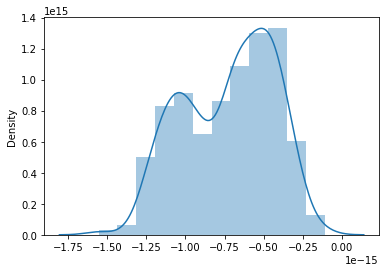

In [64]:
#obtaining the error terms

y_train_cnt=model.predict(x_train)
error=y_train-y_train_cnt

sns.distplot(error)

The assumption for normality of the error terms was violated and thus a general linear model is not the best model to use.

In [65]:
#using the Poisson regression Model since the target is a count variable.

model3=sm.GLM(y_train,x_train,family=sm.families.Poisson()).fit()
print(model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                  511
Model:                            GLM   Df Residuals:                      495
Model Family:                 Poisson   Df Model:                           15
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -362.54
Date:                Tue, 29 Mar 2022   Deviance:                       3.4690
Time:                        15:37:19   Pearson chi2:                     3.05
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9231      0.286     -6.724      0.0

## Making Predictions

In [66]:
#scaling
num=["temp","casual","registered","cnt"]
df_test[num]=scaler.fit_transform(df_test[num])
df_test.var()

<ipython-input-66-ae49d0880a5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num]=scaler.fit_transform(df_test[num])


temp          0.060027
casual        0.037138
registered    0.057006
cnt           0.054306
summer        0.195019
fall          0.188356
winter        0.178892
notwh         0.201308
mist          0.216252
lightrs       0.030946
2012          0.250809
Feb           0.090411
March         0.051806
Apr           0.083022
May           0.079265
June          0.090411
July          0.090411
Aug           0.055853
Sept          0.083022
Oct           0.075467
Nov           0.067746
Dec           0.079265
dtype: float64

In [67]:
y_test=df_test.pop("cnt")
x_test=df_test

In [68]:
x_train.columns

Index([     'const',       'temp',     'casual', 'registered',     'summer',
             'fall',     'winter',      'notwh',         2012,      'March',
              'Apr',        'May',       'June',        'Aug',       'Sept',
              'Nov'],
      dtype='object')

In [69]:
x_test=x_test[['temp','casual','registered','fall','winter','notwh','mist','Feb','Apr','May','June','Sept','Oct','Nov','Dec']]

In [70]:
x_test=sm.add_constant(x_test)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [71]:
y_test_pred=model3.predict(x_test)

In [72]:
y_test_pred

184    0.554599
535    0.916617
299    0.296965
221    0.534078
152    0.594172
         ...   
702    0.783512
127    0.429103
640    0.513280
72     0.245846
653    0.648763
Length: 220, dtype: float64

In [73]:
y_test

184    0.690412
535    0.786788
299    0.273355
221    0.534755
152    0.557925
         ...   
702    0.713951
127    0.479665
640    0.517377
72     0.197806
653    0.669707
Name: cnt, Length: 220, dtype: float64

## Model Evaluation

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.9044460267176604

This score shows that 90.44% of the variation in the count of bicycles can be predicted by the model.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'y_pred')

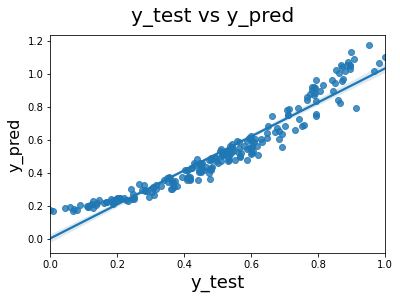

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)